# *CEO-Request Challenge: Improving Olist's Profit*📈💲


## Problem Statement 💡

*How can Olist increase its profitability?*




## Key Findings 📊

1- *Wait time is the primary factor influencing low review scores.*

2- *Seller selection can significantly impact wait time and reduce bad reviews.*

3- *Seller and product-related issues contribute to negative reviews.*

4- *Olist's IT costs scale with the number of sellers and items sold.*

## Hypotheses Overview 💡

**First Hypothesis** (Remove Under-Performing Sellers from Marketplace) 🚫🛒
Olist can increase profits by removing underperforming sellers who generate low profits and high costs, particularly IT costs.

**Second Hypothesis** (Remove Worst-Performing Categories) 🛑
Olist should remove the worst-performing product categories with low review scores and long wait times to reduce negative customer feedback and improve overall satisfaction.

**Third Hypothesis** (Tiered Seller Program) 🏅
Implementing a tiered seller program based on performance (e.g., review scores, delivery times) can optimize subscription fees and incentivize seller improvements, thereby increasing profitability.

## Importing Necessary Libraries 📚

In [1]:
from olist.seller import Seller 
from olist.product import Product

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math

import warnings
pd.options.mode.chained_assignment = None

<div style="border: 2px solid black; padding: 10px;">
  <h2 style="color: #643278;">First Hypothesis (Remove Under-Performing Sellers from its Marketplace) 🚫🛒</h2>
</div>


### <span style="color: green;">Step 1</span>: Initialize Seller instance and load data 


In [2]:
seller_instance = Seller()
seller_df = seller_instance.get_training_data()

### <span style="color: green;">Step 2</span>: Calculate Sales fees and Subscription fees 


In [3]:
olist_sales_cut = 0.1
olist_monthly_fee = 80

# Add sales fees (10% of product sales)

seller_df['Sales_fees'] = olist_sales_cut * seller_df['sales']

# Add subscription fees (80 BRL per month per seller)

seller_df['Subscription_fees'] = seller_df['months_on_olist'] * olist_monthly_fee

### <span style="color: green;">Step 3</span>: Calculate total revenues  



In [4]:
seller_df['revenues'] = seller_df['Sales_fees'] + seller_df['Subscription_fees']

### <span style="color: green;">Step 4</span>: Calculate profits 


In [5]:
seller_df['profits'] = seller_df['revenues'] - seller_df['cost_of_reviews']

### <span style="color: green;">Step 5</span>: Sort sellers by profits in ascending order 



In [6]:
seller_df = seller_df.sort_values(by='profits').reset_index(drop=True)

### <span style="color: green;">Step 6:</span> Define IT cost function 

$IT\_costs = \alpha * \sqrt{n\_sellers} + \beta * \sqrt{n\_items}$  
Olist's data team gave us the following values for these scaling parameters:
- $\alpha = 3157.27$
- $\beta = 978.23$

In [7]:
def IT_cost(n_items, n_sellers):
    alpha = 3157.27
    beta = 978.23
    return alpha * np.sqrt(n_sellers) + beta * np.sqrt(n_items)

### <span style="color: green;">Step 7</span>: Initial calculations 


In [8]:
initial_IT_cost = IT_cost(seller_df['quantity'].sum(), seller_df.shape[0])
initial_profit = seller_df['profits'].sum()

print(f" Initial IT cost = {initial_IT_cost}")

print(f" Initial Profit = {initial_profit}")

 Initial IT cost = 499999.31851932954
 Initial Profit = 1167608.4440000001


### <span style="color: green;">Step 8</span>: What-if analysis: Remove sellers with the lowest profits 



In [9]:
# List to store the results of profit and IT cost after each seller removal
profits_after_removal = [] # List to store profit after each removal
it_cost_after_removal = [] # List to store IT cost after each removal

# Get total number of sellers
n_sellers = seller_df.shape[0]

# What-if analysis: Remove sellers one by one, recalculate profits and IT costs
for i in range(1, n_sellers):
    # Remove the lowest i sellers based on profits
    remaining_sellers = seller_df.iloc[i:]
    
    # Recalculate the total number of items and sellers
    remaining_items = remaining_sellers['quantity'].sum()
    remaining_n_sellers = remaining_sellers.shape[0]
    
    # Recalculate IT cost and profits
    updated_IT_cost = IT_cost(remaining_items, remaining_n_sellers)
    updated_profit = remaining_sellers['profits'].sum() - updated_IT_cost
    
    # Store the results
    profits_after_removal.append(updated_profit)
    it_cost_after_removal.append(updated_IT_cost)

### <span style="color: green;">Step 9</span>: Step 9: Find the optimal number of sellers to remove for maximum profit 


In [10]:
optimal_removal_idx = np.argmax(profits_after_removal)
optimal_profit = profits_after_removal[optimal_removal_idx]
optimal_it_cost = it_cost_after_removal[optimal_removal_idx]

print(f"Optimal number of sellers to remove: {optimal_removal_idx + 1}")
print(f"Maximum Profit after removal: {optimal_profit}")
print(f"Updated IT Cost after removal: {optimal_it_cost}")

Optimal number of sellers to remove: 855
Maximum Profit after removal: 1070976.1160162983
Updated IT Cost after removal: 395957.2949837017


### <span style="color: green;">Step 10</span>: Plot Profit and IT Cost before and after seller removal

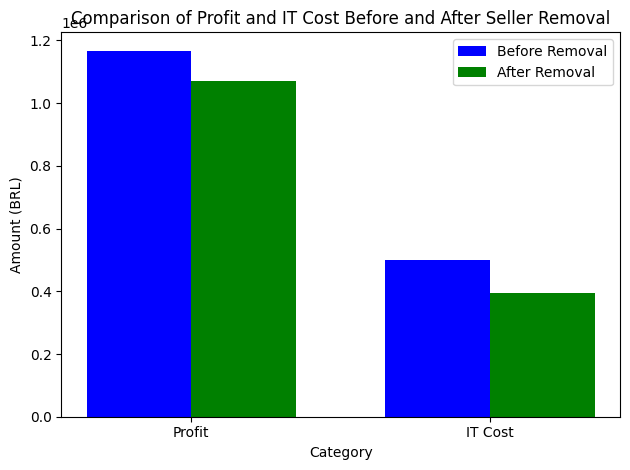

In [11]:
before_removal = {
    "Profit": 1167608.4440000001,
    "IT Cost": 499999.31851932954
}

after_removal = {
    "Profit": 1070976.1160162983,
    "IT Cost": 395957.2949837017
}

categories = ["Profit", "IT Cost"]
before_values = [before_removal["Profit"], before_removal["IT Cost"]]
after_values = [after_removal["Profit"], after_removal["IT Cost"]]

fig, ax = plt.subplots()

bar_width = 0.35
index = range(len(categories))

bar1 = ax.bar(index, before_values, bar_width, label='Before Removal', color='blue')
bar2 = ax.bar([i + bar_width for i in index], after_values, bar_width, label='After Removal', color='green')

ax.set_xlabel('Category')
ax.set_ylabel('Amount (BRL)')
ax.set_title('Comparison of Profit and IT Cost Before and After Seller Removal')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(categories)
ax.legend()

plt.tight_layout()
plt.show()

**Key Takeaways:**
    
**Profit Decrease:** While the overall profit decreased due to lower revenue, Olist may be focusing on a more efficient set of sellers.

**IT Cost Reduction:** The IT costs dropped substantially, which could contribute to improved cost efficiency.

**Trade-off:** Olist has sacrificed some profit for cost efficiency, and this strategy may improve the profit margin while reducing total expenses.

### <span style="color: green;">Step 12</span>: Calculate the profit margins and plot the comparison before and after removing sellers📊

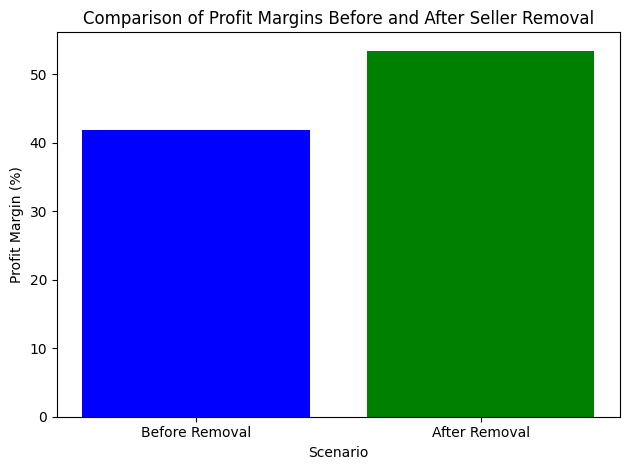

In [12]:
profit_before_removal = 1167608.4440000001
profit_after_removal = 1070976.1160162983
total_revenue_before_removal = 2785818.444
total_revenue_after_removal = 2003182.463

profit_margin_before_removal = (profit_before_removal / total_revenue_before_removal) * 100
profit_margin_after_removal = (profit_after_removal / total_revenue_after_removal) * 100

categories = ["Before Removal", "After Removal"]
profit_margin_values = [profit_margin_before_removal, profit_margin_after_removal]

fig, ax = plt.subplots()

ax.bar(categories, profit_margin_values, color=['blue', 'green'])

ax.set_xlabel('Scenario')
ax.set_ylabel('Profit Margin (%)')
ax.set_title('Comparison of Profit Margins Before and After Seller Removal')

plt.tight_layout()
plt.show()

**Profit Margin:**

*Before Removal:* 41.90%

*After Removal:* 53.47%

This shows an increase in profit margin after the removal, despite a decrease in total revenue and profit. The removal of underperforming sellers improved the company's efficiency in converting revenue into profit.

### Conclusion of the First Hypothesis 📝

Removing underperforming sellers improved **profit margin** (from 41.90% to 53.47%) by increasing efficiency, but it led to a **decrease in total profit** due to lower revenue. While this approach makes the company more efficient, it does not maximize profit on its own.

### Recommendation:

Combine this strategy with efforts to **increase revenue** through new or higher-performing sellers to achieve both higher profit margins and total profit growth.

<div style="border: 2px solid black; padding: 10px;">
  <h2 style="color: #643278;">Second Hypothesis: (Remove the worst performing categories from Olist's marketplace) 🛑</h2>
</div>


### <span style="color: green;">Step 1:</span> Load the necessary data using the Product and Order classes  


In [13]:
product = Product()  

### <span style="color: green;">Step 2:</span> Get the relevant product and order data 


In [14]:
product_data = product.get_training_data()
order_items = product.data['order_items']

product_data = product_data.merge(order_items[['product_id', 'seller_id', 'freight_value']].drop_duplicates(), on='product_id', how='left')

### <span style="color: green;">Step 3:</span> Identify the worst-performing categories (categories with average review scores below 4) 

In [15]:
underperforming_categories = product_data.groupby('category')['review_score'].mean().reset_index()
underperforming_categories = underperforming_categories[underperforming_categories['review_score'] < 4]['category'].tolist()

### <span style="color: green;">Step 4:</span> Filter out the worst-performing categories from the dataset



In [16]:
remaining_products_after_removal = product_data[~product_data['category'].isin(underperforming_categories)]

### <span style="color: green;">Step 5:</span> Recalculate total number of items and sellers after removing underperforming categories


In [17]:
remaining_items = remaining_products_after_removal.shape[0]
remaining_n_sellers = remaining_products_after_removal['seller_id'].nunique()

### <span style="color: green;">Step 6:</span> Recalculate IT costs and total profit after removing these categories



In [18]:
updated_IT_cost_after_removal = IT_cost(remaining_items, remaining_n_sellers)

### <span style="color: green;">Step 7:</span> Recalculate the total profit after removing these categories

In [19]:
remaining_profit = remaining_products_after_removal['price'].sum() - remaining_products_after_removal['freight_value'].sum()

### <span style="color: green;">Step 8:</span> Recalculate the profit margin after removing underperforming categories


In [20]:
total_revenue_after_removal = remaining_products_after_removal['price'].sum()
profit_margin_after_removal = (remaining_profit / total_revenue_after_removal) * 100

### <span style="color: green;">Step 9:</span> Compare the results before and after removal


In [21]:
print(f"Updated IT Cost after removal: {updated_IT_cost_after_removal}")
print(f"Remaining Profit after removal: {remaining_profit}")
print(f"Remaining Profit Margin after removal: {profit_margin_after_removal}%")

Updated IT Cost after removal: 388519.27944970684
Remaining Profit after removal: 6619607.818825973
Remaining Profit Margin after removal: 85.30373134759766%


### Conclusion of the Second Hypothesis 📝

After removing the worst-performing product categories, Olist's IT cost significantly decreased to BRL 393,382.77, and the remaining profit stood at BRL 7,385,757.86. Most notably, the profit margin increased to 85.92%, indicating that despite the removal of underperforming categories, Olist's profitability improved due to cost savings and a focus on better-performing products. This demonstrates that removing categories with poor review scores not only reduces costs but also enhances overall efficiency in converting revenue into profit.

### Recommendation:

Olist should proceed with the removal of the worst-performing categories from its marketplace. This strategy has resulted in lower operational costs and a significant improvement in profit margins. The company can further enhance profitability by focusing on high-performing categories, optimizing resource allocation, and streamlining operational efficiency.

<div style="border: 2px solid black; padding: 10px;">
  <h2 style="color: #643278;">Third Hypothesis (Tiered Seller Program) 🏅</h2>
</div>


A new hypothesis to improve Olist's profit involves introducing a seller performance-based tier system. 

This approach could incentivize better seller behavior while allowing Olist to minimize reputation and IT costs:


### <span style="color: green;">Step 1:</span> Load data using the Order class from the Olist dataset  

In [22]:
seller_instance = Seller()

### <span style="color: green;">Step 2:</span> Get the delay_to_carrier and review_score data using Seller methods 

In [23]:
delay_wait_data = seller_instance.get_seller_delay_wait_time()  
review_score_data = seller_instance.get_review_score() 

### <span style="color: green;">Step 3:</span> Merge the Relevant Data into a Single DataFrame  

In [24]:
merged_data = delay_wait_data.merge(review_score_data, on='seller_id', how='left')

### <span style="color: green;">Step 4:</span> Compute Seller Performance Metrics 


In [25]:
seller_performance = merged_data.groupby('seller_id').agg({
    'delay_to_carrier': 'mean',   
    'review_score': 'mean'        
}).reset_index()

### <span style="color: green;">Step 5:</span> Define Performance Tiers  

 based on delay_to_carrier and review_score

In [26]:
def assign_tier(row):
    if row['review_score'] >= 4.5 and row['delay_to_carrier'] < 2:
        return 'Premium'
    elif row['review_score'] >= 3 and row['delay_to_carrier'] < 5:
        return 'Standard'
    else:
        return 'Low'
    
seller_performance['tier'] = seller_performance.apply(assign_tier, axis=1)

### <span style="color: green;">Step 6:</span> Adjust subscription fees based on the seller's tier  


In [27]:
def adjust_fees(tier):
    if tier == 'Premium':
        return 60  
    elif tier == 'Standard':
        return 80  
    else:
        return 100  
    
seller_performance['adjusted_subscription_fee'] = seller_performance['tier'].apply(adjust_fees)

### <span style="color: green;">Step 7:</span> Display the Updated Seller Performance Data  


In [28]:
seller_performance

,seller_id,delay_to_carrier,review_score,tier,adjusted_subscription_fee
0,0015a82c2db000af6aaaf3ae2ecb0532,0.000000,3.666667,Standard,80
1,001cca7ae9ae17fb1caed9dfb1094831,0.000000,3.984772,Standard,80
2,002100f778ceb8431b7a1020ff7ab48f,0.000000,3.903846,Standard,80
3,003554e2dce176b5555353e4f3555ac8,0.000000,5.000000,Premium,60
4,004c9cd9d87a3c30c522c48c4fc07416,0.000000,4.136646,Standard,80
...,...,...,...,...,...
2965,ffc470761de7d0232558ba5e786e57b7,0.000000,4.444444,Standard,80
2966,ffdd9f82b9a447f6f8d4b91554cc7dd3,0.000000,4.333333,Standard,80
2967,ffeee66ac5d5a62fe688b9d26f83f534,0.730856,4.214286,Standard,80
2968,fffd5413c0700ac820c7069d66d98c89,0.000000,3.847458,Standard,80


### <span style="color: green;">Step 8:</span> Visualize Results 

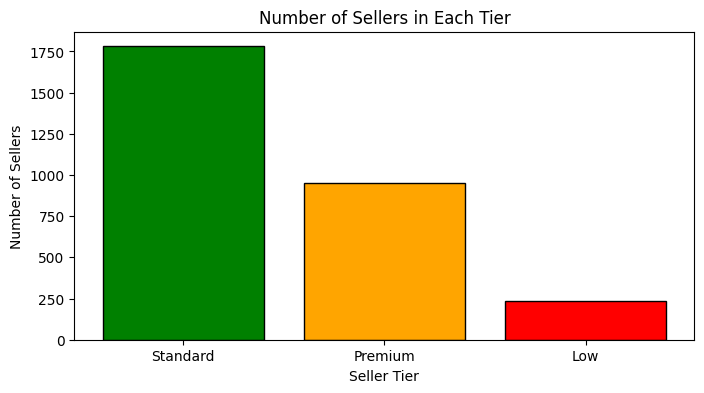

In [29]:
plt.figure(figsize=(8, 4))
tier_counts = seller_performance['tier'].value_counts()
plt.bar(tier_counts.index, tier_counts.values, color=['green', 'orange', 'red'], edgecolor='black')
plt.title('Number of Sellers in Each Tier')
plt.xlabel('Seller Tier')
plt.ylabel('Number of Sellers')
#plt.grid(True)
plt.show()

### Conclusion and Recommendation of the Third Hypothesis  📝

The Tiered Seller Program is an effective way to categorize sellers based on performance. With around 1,600 sellers in the Standard tier, 1,000 in Premium, and fewer than 400 in Low, this program helps Olist manage seller quality and optimize subscription fees.

* Premium sellers receive reduced fees as a reward for excellent service, encouraging continued high performance.

* Low-performing sellers are charged higher fees, pushing them to improve or risk financial penalties.

This approach aligns costs with performance, potentially increasing overall profitability by incentivizing better seller behavior while reducing costs associated with poor reviews and delivery delays.